# Analytics & Descriptive statistics

Some question we will try to answer from the dataset related to our specific analysis
* Total number of answers in the questionnaire
* Geographical distributions
* If there is missing answers 
* 1) SKILLS
    * 1.1) Frequency of each skill
    * 1.2) How are skills correlated with each others 
* 2) JOBS 
    * 2.1) Freauency of each job
    * 2.2) How are jops related to each others 
* 3) Ralation between the skills and the jobs
* 4) What is the the specificty of each skill to a job 

In [1]:
DF_PATH = "../data/processed/1_preprocessed_df.pkl"
ROLES_PATH = "../data/raw/roles_short_names.csv" 
FIG_DIR = "../reports/figures"

NA_STRING = 'Not Specified'
TRANSPARENT_STRING = 'rgba(0, 0, 0, 0)'

# Columns we choose to work with that is related to our analysis 
ROLE_COLS      = ['DevType']
TECH_COLS      = ['LanguageHaveWorkedWith',
                  'DatabaseHaveWorkedWith',
                  'PlatformHaveWorkedWith',
                  'WebframeHaveWorkedWith',
                  'MiscTechHaveWorkedWith',
                  'ToolsTechHaveWorkedWith',
                  'NEWCollabToolsHaveWorkedWith']

In [2]:
# Load packages
import pandas as pd 
import numpy as np
import logging
import pickle
import os

import plotly 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.manifold import TSNE
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import AgglomerativeClustering

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# To display all columns and rows
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000



_________

## Read data and preprocess

In [3]:
# Read Data 
raw_df = pd.read_pickle(DF_PATH)
roles_names = pd.read_csv(ROLES_PATH, sep=';')

At first we will encode the data.

In [4]:
df = raw_df.copy()
encoded_dfs = {}

# Insiantiating the banarizer
banarizer = MultiLabelBinarizer()

for col in ROLE_COLS + TECH_COLS:
    encoded_df = pd.DataFrame(banarizer.fit_transform(df[col]),
                              columns = banarizer.classes_,
                              index = df[col].index)
    encoded_dfs[col] = encoded_df

In [5]:
# Merge the encoded dataframes
df = pd.concat(encoded_dfs, axis =1)
df.head(2)

DevType                           \
  Academic researcher Data or business analyst   
0                   0                        0   
1                   0                        0   

                                                                        \
  Data scientist or machine learning specialist Database administrator   
0                                             0                      0   
1                                             0                      0   

                                                                        \
  Designer DevOps specialist Developer, QA or test Developer, back-end   
0        0                 0                     0                   0   
1        0                 0                     0                   0   

                                                 \
  Developer, desktop or enterprise applications   
0                                             0   
1                                             0   

                                                                    \
  Developer, embedded applications or devices Developer, front-end   
0                                           0                    0   
1                                           0                    0   

                                                                       \
  Developer, full-stack Developer, game or graphics Developer, mobile   
0                     0                           0                 1   
1                     0                           0                 0   

                                                                          \
  Educator Engineer, data Engineer, site reliability Engineering manager   
0        0              0                          0                   0   
1        0              0                          0                   0   

                                                                           \
  Marketing or sales professional Other (please specify): Product manager   
0                               0                       0               0   
1                               0                       0               0   

                                                                               \
  Scientist Senior Executive (C-Suite, VP, etc.) Student System administrator   
0         0                                    0       0                    0   
1         0                                    0       0                    0   

  LanguageHaveWorkedWith                                                      \
                     APL Assembly Bash/Shell  C C# C++ COBOL Clojure Crystal   
0                      0        0          0  0  0   1     0       0       0   
1                      0        0          0  0  0   0     0       0       0   

                                                                           \
  Dart Delphi Elixir Erlang F# Go Groovy HTML/CSS Haskell Java JavaScript   
0    0      0      0      0  0  0      0        1       0    0          1   
1    0      0      0      0  0  0      0        0       0    0          1   

                                                                              \
  Julia Kotlin LISP Matlab Node.js Objective-C PHP Perl PowerShell Python  R   
0     0      0    0      0       0           1   1    0          0      0  0   
1     0      0    0      0       0           0   0    0          0      1  0   

                                           DatabaseHaveWorkedWith            \
  Ruby Rust SQL Scala Swift TypeScript VBA              Cassandra Couchbase   
0    0    0   0     0     1          0   0                      0         0   
1    0    0   0     0     0          0   0                      0         0   

                                                                        \
  DynamoDB Elasticsearch Firebase IBM DB2 MariaDB Microsoft SQL Server   
0        0             0        0       0       0                    0   
1        0 

## 1.1) Display skills frequency

In [6]:
skills_freq = df.copy().drop("DevType", axis=1).sum().reset_index()
skills_freq.columns = ['group', 'skill', 'freq']

In [7]:
skills_freq.sort_values("freq",ascending=False)

group                        skill   freq
95        ToolsTechHaveWorkedWith                          Git  68171
122  NEWCollabToolsHaveWorkedWith           Visual Studio Code  58026
19         LanguageHaveWorkedWith                   JavaScript  53587
16         LanguageHaveWorkedWith                     HTML/CSS  46259
29         LanguageHaveWorkedWith                       Python  39792
33         LanguageHaveWorkedWith                          SQL  38835
93        ToolsTechHaveWorkedWith                       Docker  35644
47         DatabaseHaveWorkedWith                        MySQL  35289
18         LanguageHaveWorkedWith                         Java  29162
52         PlatformHaveWorkedWith                          AWS  29138
49         DatabaseHaveWorkedWith                   PostgreSQL  28424
24         LanguageHaveWorkedWith                      Node.js  27975
121  NEWCollabToolsHaveWorkedWith                Visual Studio  26970
70         WebframeHaveWorkedWith                     React.js  25296
36         LanguageHaveWorkedWith                   TypeScript  24909
112  NEWCollabToolsHaveWorkedWith                    Notepad++  24262
109  NEWCollabToolsHaveWorkedWith                     IntelliJ  23467
4          LanguageHaveWorkedWith                           C#  22984
51         DatabaseHaveWorkedWith                       SQLite  22634
2          LanguageHaveWorkedWith                   Bash/Shell  22385
76         WebframeHaveWorkedWith                       jQuery  21693
5          LanguageHaveWorkedWith                          C++  20057
120  NEWCollabToolsHaveWorkedWith                          Vim  19752
46         DatabaseHaveWorkedWith                      MongoDB  19479
45         DatabaseHaveWorkedWith         Microsoft SQL Server  18896
104  NEWCollabToolsHaveWorkedWith               Android Studio  18141
26         LanguageHaveWorkedWith                          PHP  18130
3          LanguageHaveWorkedWith                            C  17329
118  NEWCollabToolsHaveWorkedWith                 Sublime Text  16714
54         PlatformHaveWorkedWith        Google Cloud Platform  16687
78         MiscTechHaveWorkedWith               .NET Framework  16620
57         PlatformHaveWorkedWith              Microsoft Azure  16540
84         MiscTechHaveWorkedWith                        NumPy  16445
114  NEWCollabToolsHaveWorkedWith                      PyCharm  15755
77         MiscTechHaveWorkedWith           .NET Core / .NET 5  15310
65         WebframeHaveWorkedWith                      Express  15010
50         DatabaseHaveWorkedWith                        Redis  14552
61         WebframeHaveWorkedWith                      Angular  14471
85         MiscTechHaveWorkedWith                       Pandas  13664
106  NEWCollabToolsHaveWorkedWith                      Eclipse  12955
103       ToolsTechHaveWorkedWith                         Yarn  12937
55         PlatformHaveWorkedWith                       Heroku  12897
96        ToolsTechHaveWorkedWith                   Kubernetes  12115
44         DatabaseHaveWorkedWith                      MariaDB  12088
75         WebframeHaveWorkedWith                       Vue.js  11954
60         WebframeHaveWorkedWith                ASP.NET Core   11404
42         DatabaseHaveWorkedWith                     Firebase  11373
105  NEWCollabToolsHaveWorkedWith                         Atom  10564
108  NEWCollabToolsHaveWorkedWith              IPython/Jupyter  10310
67         WebframeHaveWorkedWith                        Flask  10174
59         WebframeHaveWorkedWith                      ASP.NET   9918
53         PlatformHaveWorkedWith                 DigitalOcean   9495
63         WebframeHaveWorkedWith                       Django   9446
41         DatabaseHaveWorkedWith                Elasticsearch   9331
72         WebframeHaveWorkedWith                       Spring   9177
124  NEWCollabToolsHaveWorkedWith                        Xcode   9040
28         LanguageHaveWorkedWith     

In [8]:
fig = px.treemap(skills_freq, 
                 path=['group', 'skill'], 
                 color_continuous_scale='deep',
                 values='freq',color='freq')

# fig.update_layout(width=1400, height=700)
fig.show()

# Saving the figure in reports folder with .html for better visual
fig.write_html(os.path.join(FIG_DIR, 'treemap_skills_freq.html'))


As se can see from the treemap the relation between all the groups "skills used by people" and the relation of each skill in each group.
* "JavaScript", "HTML&CSS", "PYTHON" and "SQL" are the most used languages.
* "GIT" and "DOCKER" are the most used tech tools used i all the groups.
* "MySQL" and "PostgreSQL" are kind of dominant with all users.


## 1.2) How are skills correlated with each others

In [10]:
sorted_roles = df["DevType"].sum().sort_values().index.tolist()
sorted_skills = df.drop(["DevType"],axis=1).sum().sort_values(ascending=False).droplevel(level=0).index.tolist()

In [11]:
skills = []

# For each role we will calculate the presentage of each skill
for role in sorted_roles:
    # filter the role from the df
    role_mask = df[("DevType", role)] == 1
    
    # For each skill column in this role we will calculate its mean
    skills_role = pd.concat({tech_col: df.loc[role_mask,tech_col].mean() * 100
                            for tech_col in TECH_COLS})
    skills.append(skills_role)


# Concat and format
skills = pd.concat(skills, axis=1)
skills.columns = sorted_roles
skills = skills.reset_index(level=0, drop=True)
skills = skills.loc[sorted_skills]
skills = skills.T

In [12]:
skills.head()

Git  Visual Studio Code  \
Marketing or sales professional       70.062696           61.285266   
Scientist                             81.687345           52.109181   
Senior Executive (C-Suite, VP, etc.)  84.688540           66.096053   
Developer, game or graphics           84.375000           72.206439   
Educator                              82.566484           65.512875   

                                      JavaScript   HTML/CSS     Python  \
Marketing or sales professional        71.943574  71.316614  40.909091   
Scientist                              42.431762  40.049628  76.079404   
Senior Executive (C-Suite, VP, etc.)   77.223015  63.195435  43.747028   
Developer, game or graphics            64.914773  55.160985  46.543561   
Educator                               66.483748  60.869565  51.878430   

                                            SQL     Docker      MySQL  \
Marketing or sales professional       57.053292  32.601881  54.075235   
Scientist                             34.937965  43.672457  31.910670   
Senior Executive (C-Suite, VP, etc.)  59.771755  58.297670  46.742748   
Developer, game or graphics           41.145833  39.299242  43.844697   
Educator                              50.189954  45.462220  47.868299   

                                           Java        AWS  PostgreSQL  \
Marketing or sales professional       27.586207  43.260188   31.504702   
Scientist                             25.607940  32.158809   33.300248   
Senior Executive (C-Suite, VP, etc.)  30.147408  59.486448   49.215407   
Developer, game or graphics           36.789773  34.753788   30.113636   
Educator                              35.500211  36.513297   39.890249   

                                        Node.js  Visual Studio   React.js  \
Marketing or sales professional       39.341693      33.385580  28.683386   
Scientist                             20.794045      24.367246  16.625310   
Senior Executive (C-Suite, VP, etc.)  46.077033      30.052306  39.800285   
Developer, game or graphics           39.204545      56.250000  31.912879   
Educator                              37.146475      31.869987  32.292106   

                                      TypeScript  Notepad++   IntelliJ  \
Marketing or sales professional        25.391850  36.050157  18.965517   
Scientist                              14.590571  30.421836  19.404467   
Senior Executive (C-Suite, VP, etc.)   39.657632  24.251070  26.058012   
Developer, game or graphics            32.954545  38.115530  27.083333   
Educator                               30.434783  33.600675  27.606585   

                                             C#     SQLite  Bash/Shell  \
Marketing or sales professional       28.369906  35.423197   29.310345   
Scientist                             17.866005  33.796526   40.942928   
Senior Executive (C-Suite, VP, etc.)  30.765573  33.048027   36.471707   
Developer, game or graphics           55.445076  36.174242   29.876894   
Educator                              28.197552  39.046011   34.065006   

                                         jQuery        C++        Vim  \
Marketing or sales professional       42.789969  22.884013  20.062696   
Scientist                             19.950372  41.389578  34.987593   
Senior Executive (C-Suite, VP, etc.)  32.239658  21.017594  28.055159   
Developer, game or graphics           29.450758  50.047348  23.484848   
Educator                              33.474040  27.902068  28.197552   

                                        MongoDB  Microsoft SQL Server  \
Marketing or sales professional       24.137931             27.742947   
Scientist                             18.163772             15.732010   
Senior Executive (C-Suite, VP, etc.)  28.958631             29.101284   
Developer, game or graphics           26.089015             21.827652   
Educator                              27.184466             24.693964   

                                      Android Studio     

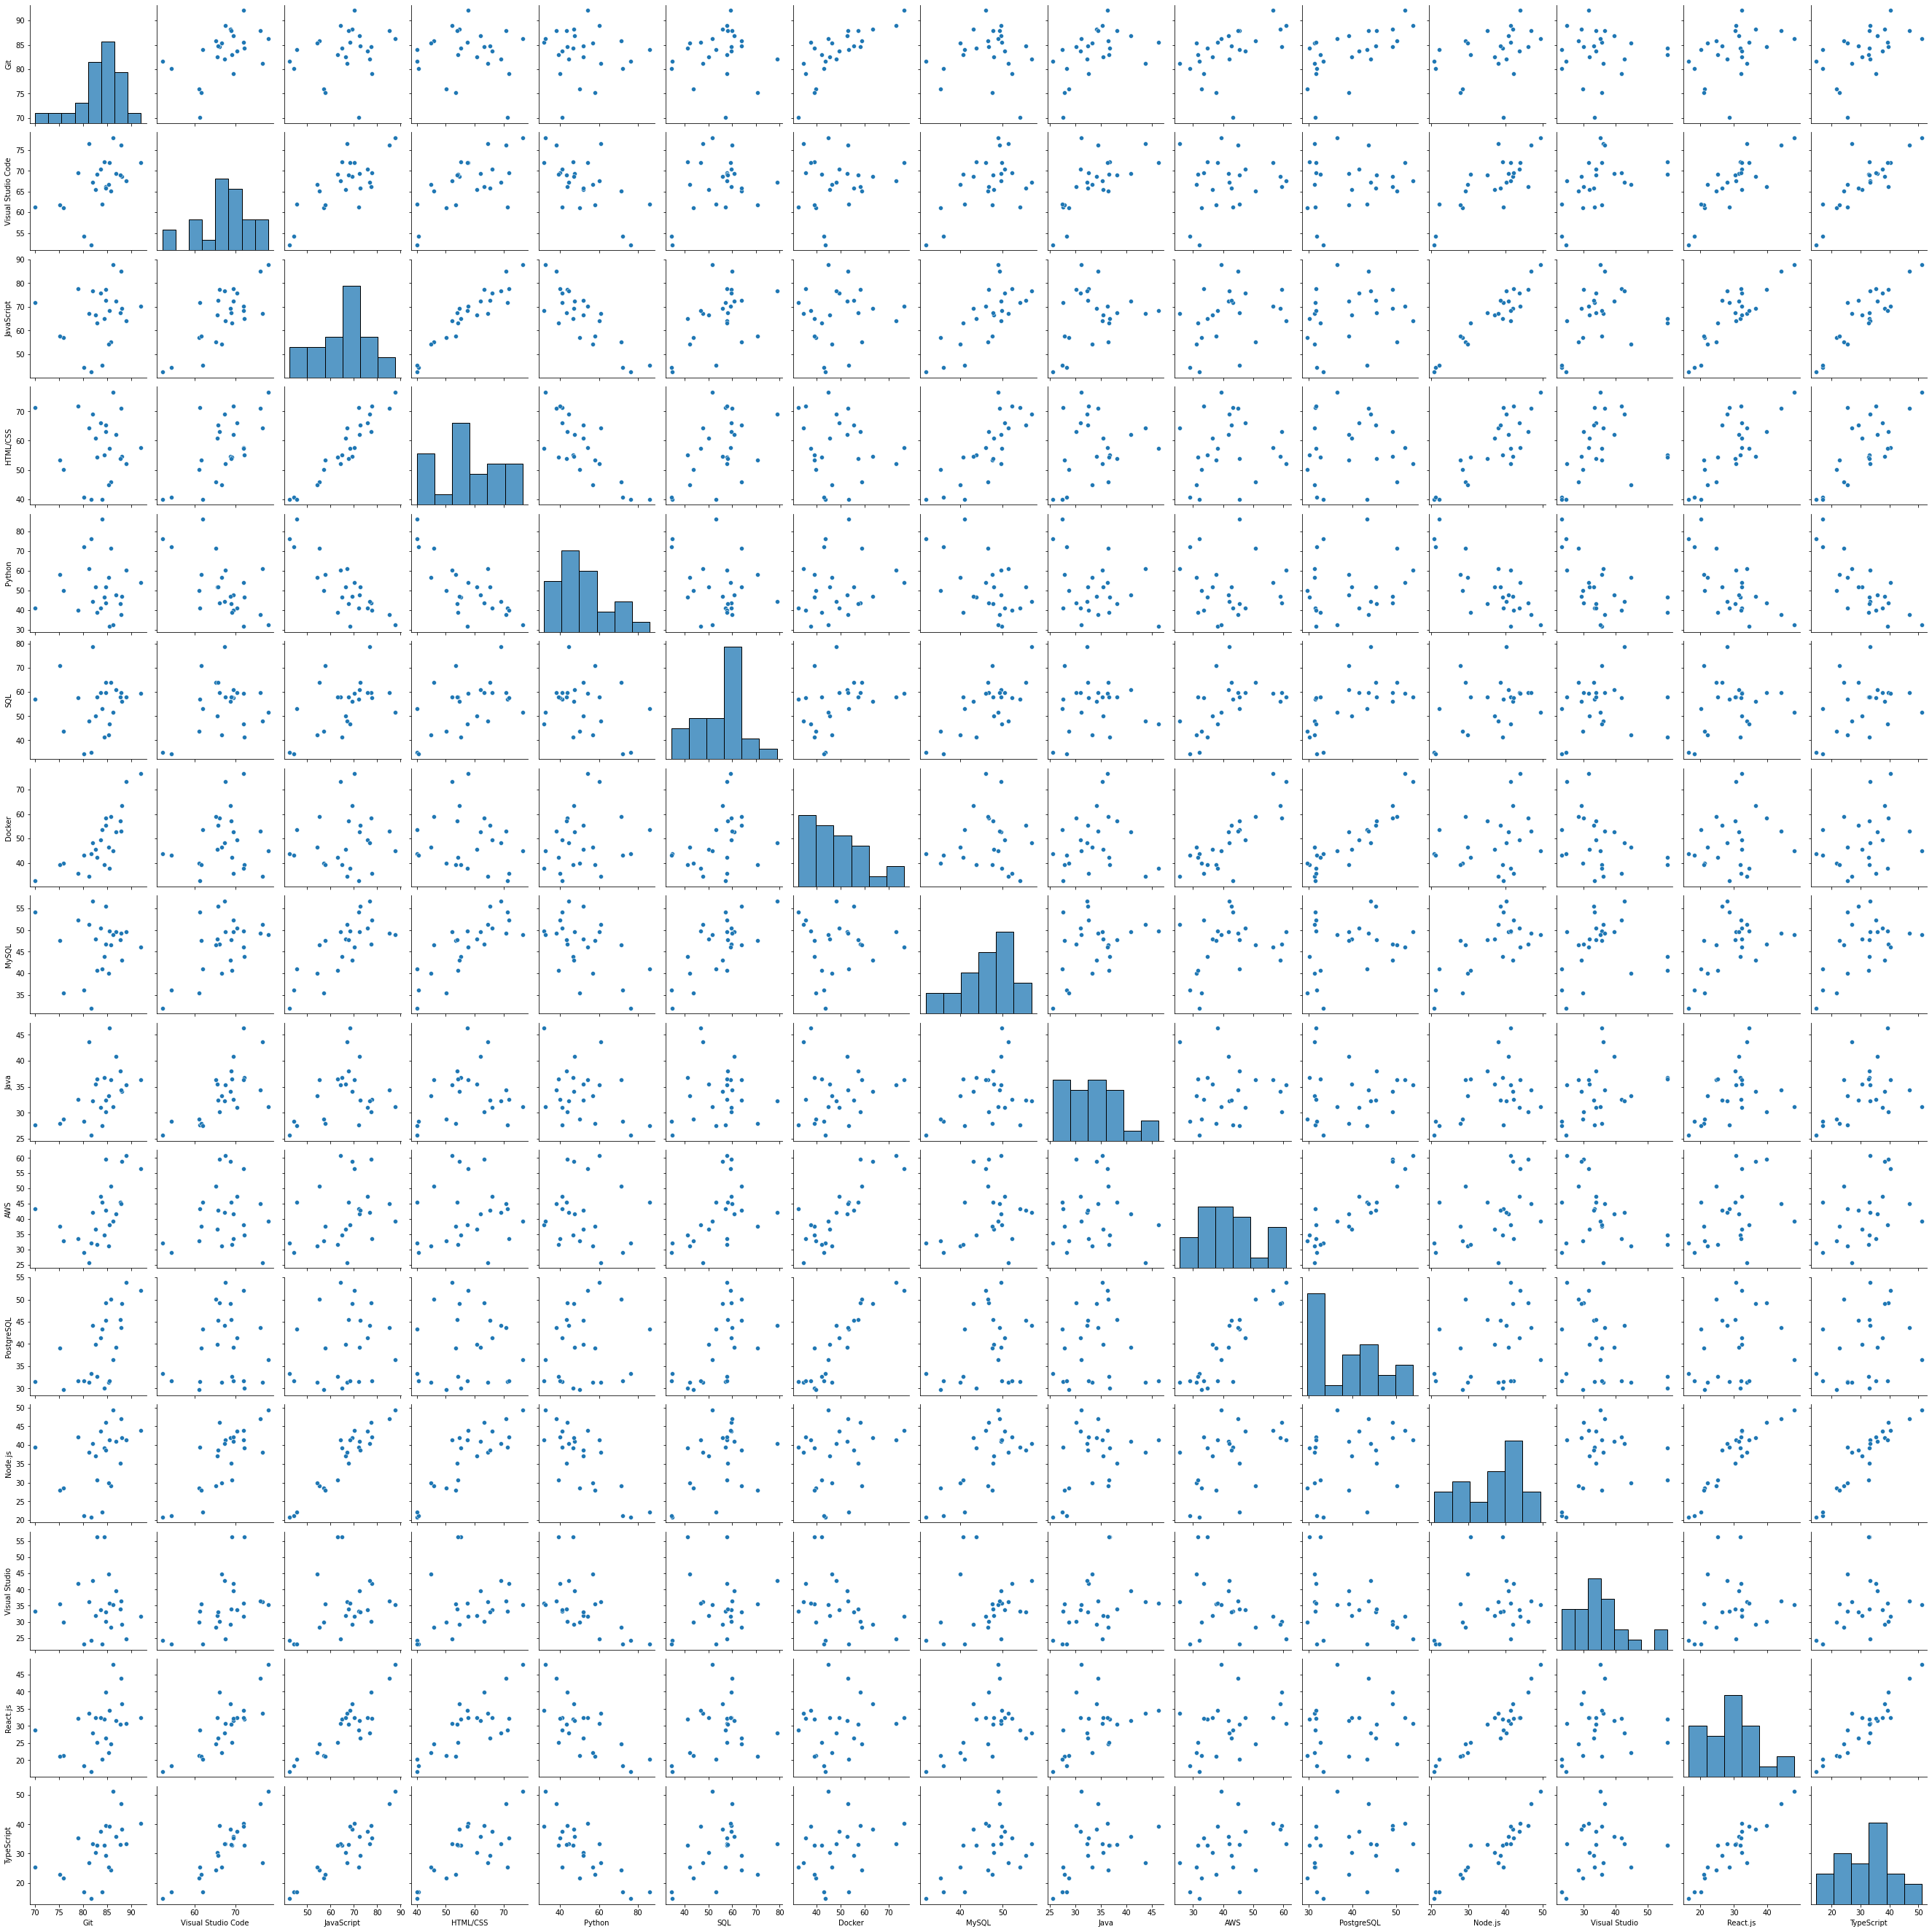

In [13]:
# We can try pairplots of seaborn, bur we havw 125 skills which will bw in tota 15625 subplot
# So we will try it also but with smaller number
import seaborn as sns
sns.pairplot(skills.iloc[:,0:15])
plt.show()

##### A better way to understand the correlation between skills

In [14]:
# calculationg the person correlation of all skills
corr_skills = np.corrcoef(skills.T)
corr_skills=pd.DataFrame(corr_skills)
corr_skills.index= sorted_skills
corr_skills.columns = sorted_skills
corr_skills.head()

Git  Visual Studio Code  JavaScript  HTML/CSS  \
Git                 1.000000            0.488884    0.211174 -0.064088   
Visual Studio Code  0.488884            1.000000    0.759848  0.641520   
JavaScript          0.211174            0.759848    1.000000  0.943097   
HTML/CSS           -0.064088            0.641520    0.943097  1.000000   
Python             -0.039626           -0.622498   -0.831732 -0.767183   

                      Python       SQL    Docker     MySQL      Java  \
Git                -0.039626  0.079157  0.766974  0.022560  0.474808   
Visual Studio Code -0.622498  0.277450  0.119068  0.544680  0.656789   
JavaScript         -0.831732  0.507033  0.080520  0.743980  0.285367   
HTML/CSS           -0.767183  0.473122 -0.157985  0.792171  0.179044   
Python              1.000000 -0.275615  0.179828 -0.498320 -0.337326   

                         AWS  PostgreSQL   Node.js  Visual Studio  React.js  \
Git                 0.504308    0.611419  0.361736      -0.022530  0.413199   
Visual Studio Code  0.150566    0.132368  0.788090       0.472149  0.817951   
JavaScript          0.305176    0.209551  0.946941       0.323600  0.876051   
HTML/CSS            0.100831    0.016547  0.845841       0.320937  0.755050   
Python             -0.062980    0.127899 -0.765814      -0.538379 -0.692940   

                    TypeScript  Notepad++  IntelliJ        C#    SQLite  \
Git                   0.524161  -0.300368  0.696915  0.149692 -0.026739   
Visual Studio Code    0.830747   0.103597  0.629399  0.560567 -0.039283   
JavaScript            0.894090   0.079353  0.276601  0.468439 -0.104239   
HTML/CSS              0.724933   0.186499  0.084335  0.400589 -0.055270   
Python               -0.791708  -0.232851 -0.196575 -0.628633 -0.080785   

                    Bash/Shell    jQuery       C++       Vim   MongoDB  \
Git                   0.402925 -0.090615 -0.105164  0.475000  0.575476   
Visual Studio Code   -0.293269  0.484474 -0.253592 -0.306865  0.769911   
JavaScript           -0.241639  0.855436 -0.561062 -0.351630  0.657515   
HTML/CSS             -0.328845  0.915069 -0.489175 -0.457888  0.533175   
Python                0.453412 -0.739704  0.403819  0.565867 -0.345795   

                    Microsoft SQL Server  Android Studio       PHP         C  \
Git                             0.026352        0.003280 -0.160305 -0.109788   
Visual Studio Code              0.288600        0.447068  0.388157 -0.311068   
JavaScript                      0.445851        0.334426  0.776044 -0.555546   
HTML/CSS                        0.403472        0.342067  0.863011 -0.480142   
Python                         -0.437481       -0.551620 -0.661367  0.427956   

                    Sublime Text  Google Cloud Platform  .NET Framework  \
Git                    -0.292481               0.096333        0.040963   
Visual Studio Code      0.150478               0.048938        0.455256   
JavaScript              0.194895               0.184660        0.460940   
HTML/CSS                0.355894               0.141423        0.420704   
Python                 -0.065682              -0.000721       -0.652800   

                    Microsoft Azure     NumPy   PyCharm  .NET Core / .NET 5  \
Git                        0.397865 -0.191032 -0.050143            0.262149   
Visual Studio Code         0.337362 -0.650120 -0.422053            0.574892   
JavaScript                 0.433241 -0.808637 -0.715608            0.544472   
HTML/CSS                   0.267739 -0.707789 -0.640082            0.431372   
Python                    -0.320630  0.919742  0.918633           -0.680393   

                     Express     Redis   Angular    Pandas   Eclipse  \
Git                 0.368516  0.630782  0.391227 -0.202402 -0.140582   
Visual Studio Code  0.848273  0.261996  0.772057 -0.633354  0.155684   
JavaScript          0.877863  0.382034  0.889972 -0.766490 -0.016343   
HTML/CSS            0.789546  0.153887  0.755674 -0.672733  0.064299   
Python   

In [15]:
fig = go.Figure(data=go.Heatmap(z=corr_skills, x=corr_skills.columns,y=corr_skills.index, colorscale='magma', ygap=1))
fig.update_layout(width=3500, height=2000)
fig.write_html(os.path.join(FIG_DIR, 'correlation_between.html'))
fig.show()
# Due to the large plot we can see it in the reports folder in html formate better 

#### Another way too spot the correlation between skills in their dataframe

In [16]:
def color_df(val):
    color = "red" if val < 0.65 else "green"
    return "color: %s" % color
corr_skills.style.applymap(color_df)

### Observation from the correlation between skills
- From our domain knowledge about "DataScience" for example 
    - python, pandas, numpy, keras, tensorflow are postivily correlated 
- Also in another field like "web developer"
    - Javascript, HTML, css, MySql, Node.js, React.js, TypeScript, jQuery, PHP are postivily correlated

## 2.1) Display jop frequancy

In [17]:
jobs_freq = df['DevType'].copy().sum().sort_values().reset_index()

In [19]:
jobs_freq

index      0
0                 Marketing or sales professional    638
1                                       Scientist   2015
2            Senior Executive (C-Suite, VP, etc.)   2103
3                     Developer, game or graphics   2112
4                                        Educator   2369
5                      Engineer, site reliability   2448
6                             Academic researcher   2899
7                                 Product manager   3074
8                         Other (please specify):   3545
9                           Developer, QA or test   3611
10                       Data or business analyst   3792
11                            Engineering manager   3810
12                                 Engineer, data   4176
13                                        Student   4187
14  Data scientist or machine learning specialist   4273
15    Developer, embedded applications or devices   4598
16                                       Designer   4611
17                         Database administrator   5655
18                           System administrator   6079
19                              DevOps specialist   7058
20                              Developer, mobile   9800
21  Developer, desktop or enterprise applications  11036
22                           Developer, front-end  18231
23                            Developer, back-end  29071
24                          Developer, full-stack  32891

As we can see from the table above there is a big differance between the maximum and minimum value,
**So we have unbalanced classes**

## 2.2) How are jobs correlated with each others


### Normalize Features
Normalizing features is a scaling technique for the independant features to have a mean of zero and std of one,
in our data we will normalize features to see how imporatant or hoe spicific this feature "skill" to the jops

In [21]:
std_skills = StandardScaler().fit_transform(skills)
std_skills = pd.DataFrame(std_skills, columns=skills.columns, index=skills.index)

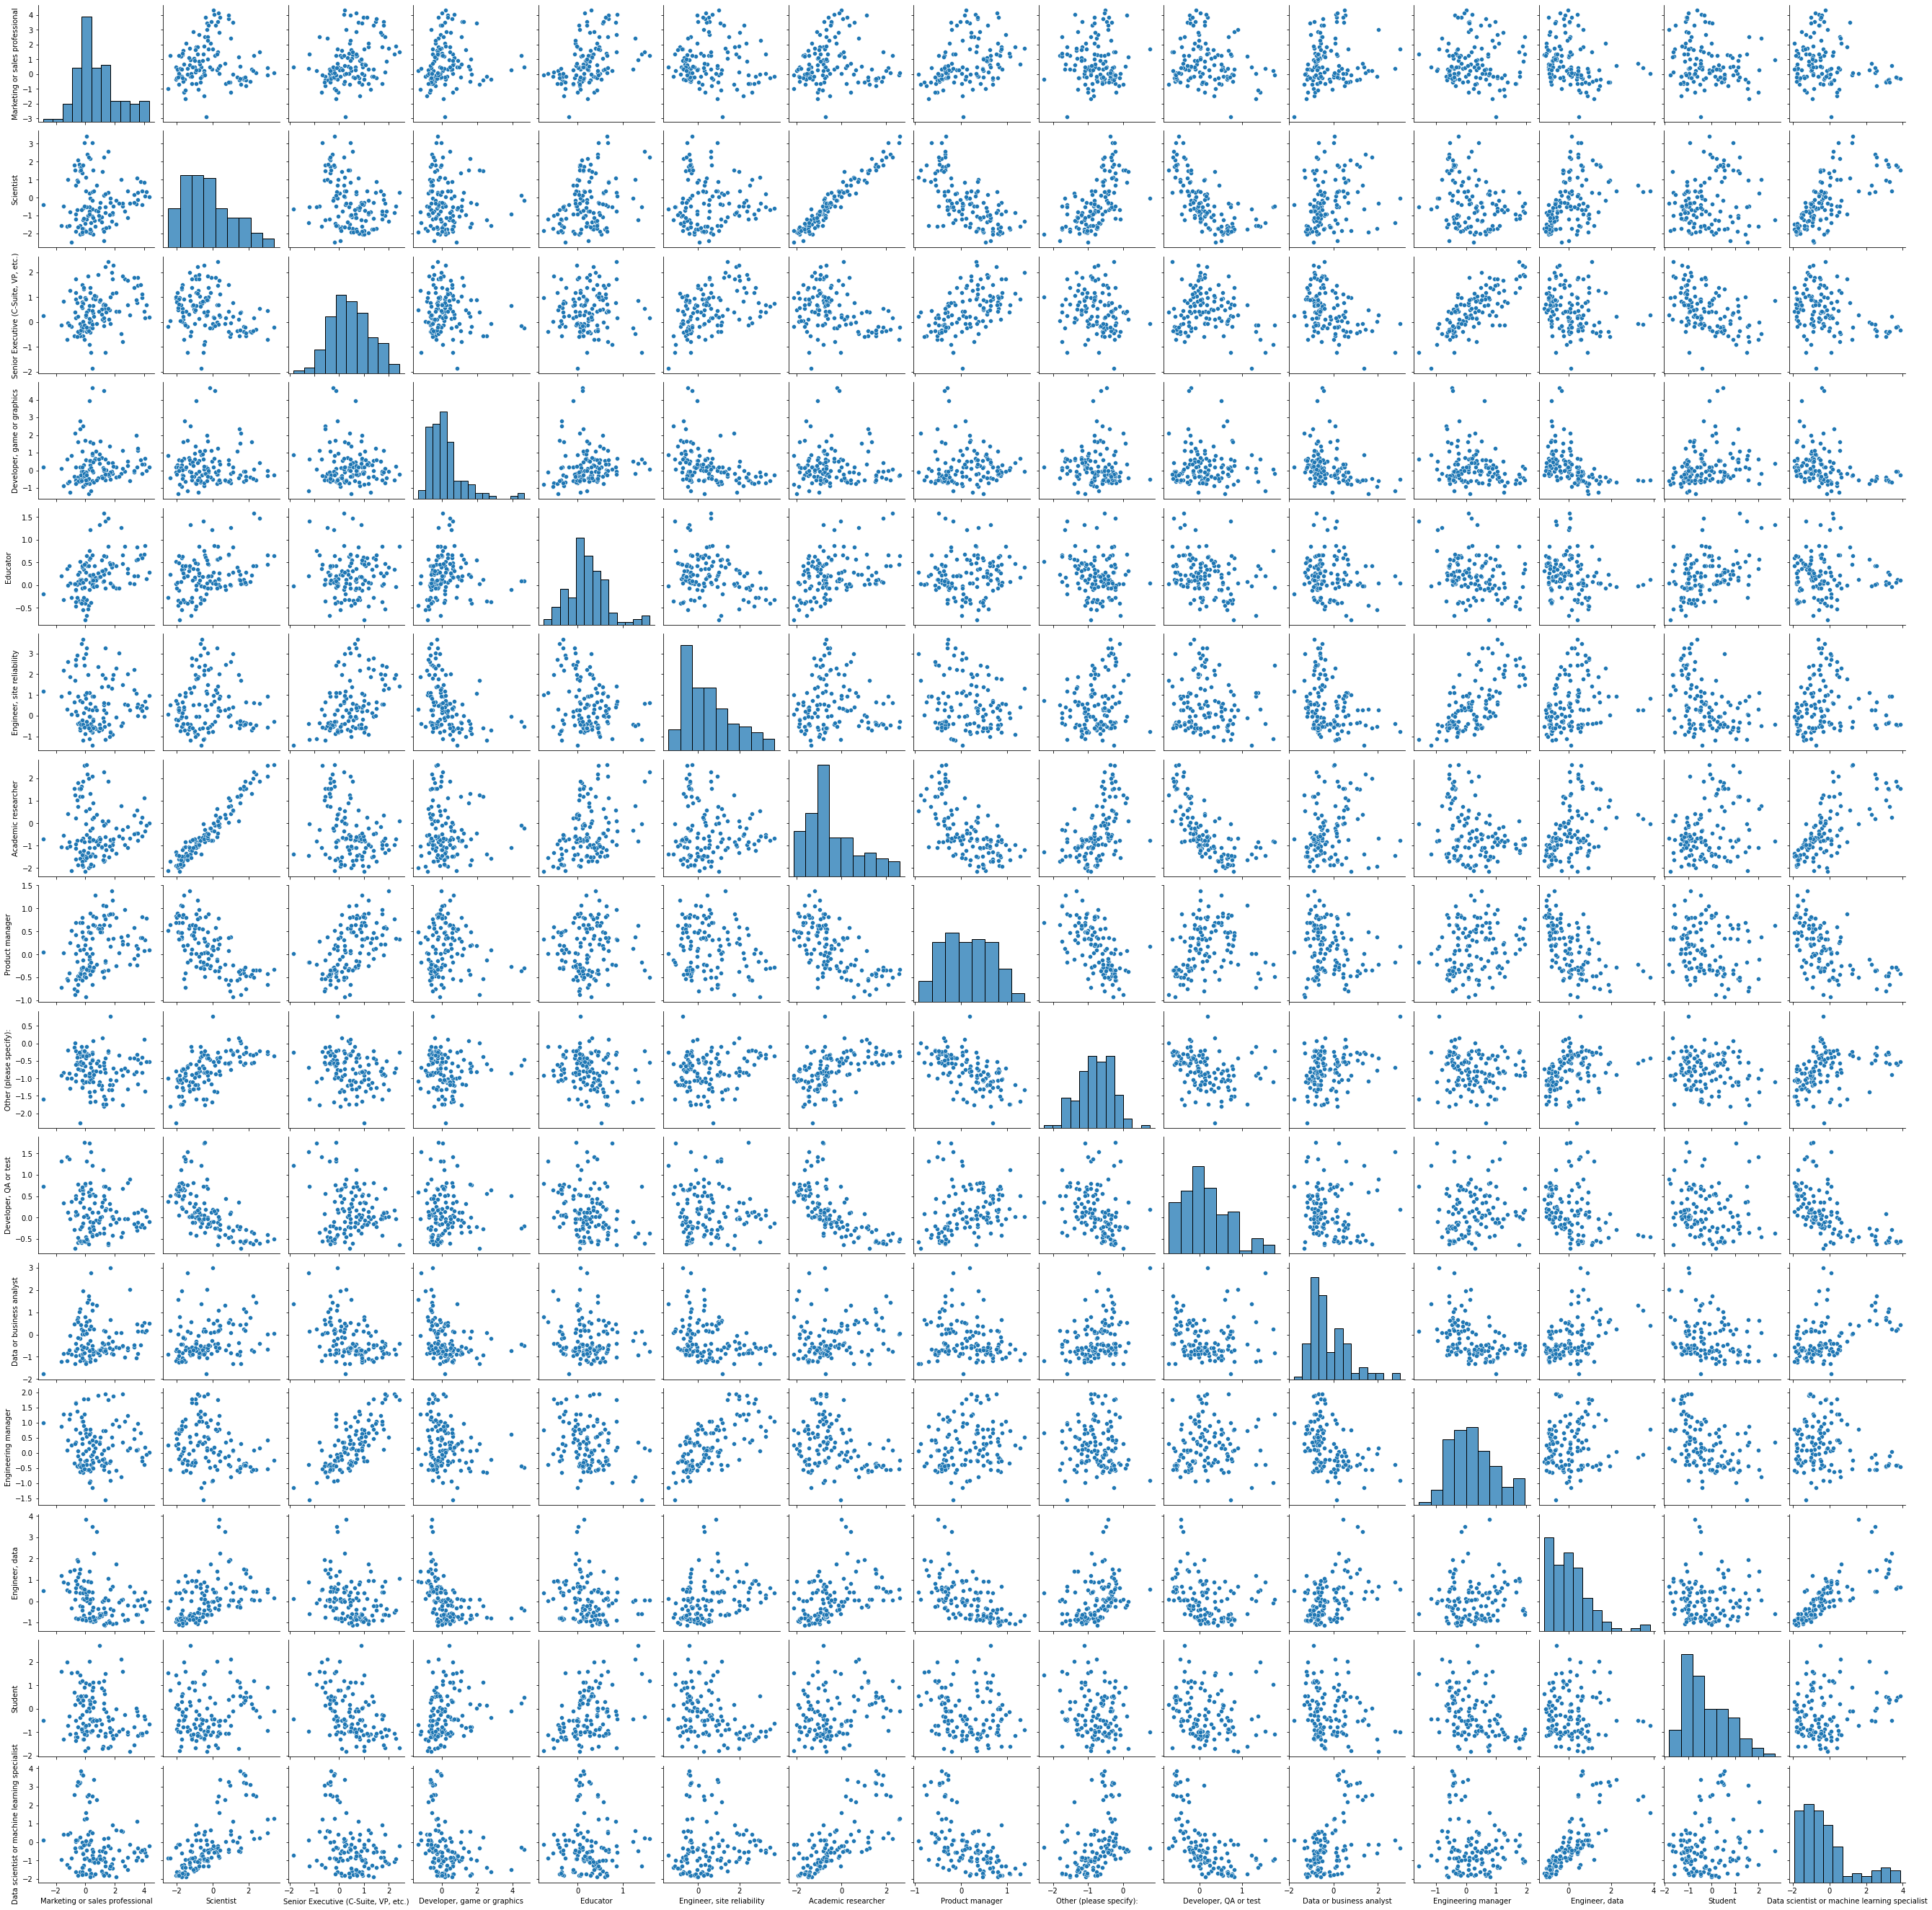

In [22]:
sns.pairplot(std_skills.T.iloc[:,0:15])
plt.show()

In [23]:
# calculationg the person correlation of all jobs
corr_jobs = np.corrcoef(std_skills)
corr_jobs = pd.DataFrame(corr_jobs)
corr_jobs.index = sorted_roles
corr_jobs.columns = sorted_roles
corr_jobs.style.applymap(color_df)


To better understand the correlation between jobs, we will

## Clustering job roles

In [24]:
roles_short_dict = roles_names.set_index('Original name')["Short name "].to_dict()
short_labels = [roles_short_dict[role] 
                for role in sorted_roles]

In [25]:
fig = ff.create_dendrogram(skills, labels = short_labels, orientation="left",color_threshold=0)
fig.update_layout(height=700, width=1000, showlegend=False)
fig.show()

### Observations from this dendogram
* The clusters are logical to the real life 
* but some roles are clustered in an un justified position "For now!", such as "Back-end dev" are clustered with "Product manager" and "Quality assurance", SO it raises a question here 
    * Why "Back-end dev" are clustered with "Product manager" and "Quality assurance"?



## 3) Create a job and skill heatmap

In [26]:
fig = go.Figure(data=go.Heatmap(z=skills, x=skills.columns,y=skills.index, colorscale='magma', ygap=1))
fig.update_layout(width=2500, height=700)
fig.write_html(os.path.join(FIG_DIR, 'heatmap.html'))
fig.show()

###### From the heat map there are some observations
* The are some values that does not make any sence like "44%" of academic researchers use javaScript  so it rasis a question here 
    * Do you need to study JavaScript to become an acadimic researcher?
* Also arround the same persent "45%" of people in data science use tensor flow, so it rasis another question 
    * Does "JavaScript" relate to researchers with the same importance as "tensor flow" to data science ? 
* Off course not we have unbalanced classes ie. Data need to be normalized .


### 4) What is the the specificty of each skill to a job

In [ ]:
fig = go.Figure(data=go.Heatmap(z=std_skills, x=std_skills.columns,y=std_skills.index, colorscale='magma', ygap=1))
fig.update_layout(width=2500, height=700)
fig.write_html(os.path.join(FIG_DIR, 'normalized_heatmap.html'))
fig.show()

###### After normalizing the features "Skills" we can answers the quiestions we raised from the previous one 
* Does "JavaScript" relate to researchers with the same importance as "tensor flow" to data science ?
    - It is not as shown in the previous heatmap when e normalized the features the spicifity of **"JavaScript"** to **researchers** is **"-1.8"** ie. Java is not specific to it, while on the other hand the spicificty of **"Tensorflow"** to **DataScience** is **"3.9"**, which makes a lot of sense

## Visualization of some job profiles

In [ ]:
def plot_job_profile(role,threshold):
    """
    Showing percentages of skills of differant job profiles and how specific each skill for the role or job
    by color scale
    
    INPUTS:
        role: the name of the jop role we want to plot
        threshold: the percentage of skill related to the role we want to stop at 
    RETURNS: 
        The plot of the job profile
    """
    
    # concatinating the percentages of the role with how specific it is to tha role
    single_role_skills = pd.concat([skills.loc[role],std_skills.loc[role]],axis=1)
    single_role_skills.columns = ['percentage', 'specificity']
    single_role_skills = single_role_skills.sort_values('percentage')
    
    # limiting our percentages to a certain thershold
    single_role_skills = single_role_skills[single_role_skills["percentage"] > threshold]

    # Ploting the figure and formating the plot 
    fig = px.bar(y=single_role_skills.index, 
                 x=single_role_skills['percentage'],
                 color=single_role_skills['specificity'], 
                 color_continuous_scale='orrd', 
                 range_color=[std_skills.values.min(),std_skills.values.max()],
                orientation='h')
    fig.update_layout(width=700, height=600, title=role)
    return fig.show()

In [ ]:
sorted_roles

In [ ]:
plot_job_profile('Data scientist or machine learning specialist',27)

As we can see the most common skills to ex ("Data Scientist"") are arranged in the graph above, and also How specific each skill to the role are in darker color such as "Keras","TensorFlow", "Pandas" and "Python".

------------